In [1]:
import os
import pymysql
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Se establecen las variables para entrar a la base de datos 3MdB

In [2]:
host = os.environ['MdB_HOST']
user = os.environ['MdB_USER']
passwd = os.environ['MdB_PASSWD']
port = os.environ['MdB_PORT']

# Conexion a la base de datos. Se sacan los valores de las emisividades de NII y OIII

In [3]:
db = pymysql.connect(host=host, user=user, passwd=passwd, port=int(port), db='3MdBs')
cursor = db.cursor()

resultA = pd.read_sql("""SELECT 
shock_params.shck_vel AS shck_vel,
shock_params.mag_fld as mag_fld,
emis_VI.NII_6583/emis_VI.HI_6563 AS NII,
emis_VI.OIII_5007/emis_VI.HI_4861 AS OIII
FROM shock_params
INNER JOIN emis_VI ON emis_VI.ModelID=shock_params.ModelID
INNER JOIN abundances ON abundances.AbundID=shock_params.AbundID
WHERE emis_VI.model_type='shock'
AND abundances.name='Allen2008_SMC'
AND shock_params.ref='Allen08'
AND shock_params.preshck_dens=1 """, con=db)
db.close()

# Flujos de las ventanas de nuestras observaciones

In [4]:
data = {'w14': [[4861, 5007, 6563, 6584, 6717, 6731], [1.17016e-11, 5.97007e-11, 4.8675e-12, 4.674e-14, 2.0607338434053516e-16, 1.5067703299570607e-16]],
       'w15': [[4861, 5007, 6563, 6584, 6717, 6731], [1.23043e-11, 6.64581e-11, 5.1488e-12, 4.143e-14, 1.470612393964757e-16, 1.0702737383225287e-16]],
       'w16': [[4861, 5007, 6563, 6584, 6717, 6731], [9.92600e-12, 5.90008e-11, 4.9160e-12, 8.150e-14, 1.1935590538088722e-16, 9.006278321498771e-17]],
       'w17': [[4861, 5007, 6563, 6584, 6717, 6731], [1.0463e-11, 5.63761e-11, 4.26116e-12, 2.819e-14, 9.256573421482766e-17, 6.794401633425876e-17]],
       'w18': [[4861, 5007, 6563, 6584, 6717, 6731], [8.6545e-12, 4.87729e-11, 3.79206e-12, 2.760e-14, 6.399278471618793e-17, 4.3753561484943617e-17]],
       'w19': [[4861, 5007, 6563, 6584, 6717, 6731], [8.31680e-12, 4.41192e-11, 3.3397e-12, 2.3273e-14, 7.548433239456072e-17, 5.3235458746283314e-17]],
       'w20': [[4861, 5007, 6563, 6584, 6717, 6731], [7.5507e-12, 3.90227e-11, 3.00759e-12, 2.7423e-14, 7.683795740457182e-17, 5.3546637011343506e-17]],
       'w21': [[4861, 5007, 6563, 6584, 6717, 6731], [7.2166e-12, 3.64565e-11, 2.859682e-12, 2.9609e-14, 6.552320845655048e-17, 4.5914420406619114e-17]],
       'w22': [[4861, 5007, 6563, 6584, 6717, 6731], [6.4756e-12, 3.25055e-11, 2.641308e-12, 2.778e-14, 7.689257704394597e-17, 5.494134581547355e-17]],
       'w23': [[4861, 5007, 6563, 6584, 6717, 6731], [ 5.890e-12, 2.98451e-11, 2.4663443e-12, 2.6589e-14, 7.924711349118733e-17, 5.612428575013224e-17]],
       'w24': [[4861, 5007, 6563, 6584, 6717, 6731], [5.3867e-12, 2.73809e-11, 2.9882e-12, 7.071e-15, 8.201321431303456e-17, 5.521828882777655e-17]],
       'w25': [[4861, 5007, 6563, 6584, 6717, 6731], [5.1763e-12, 2.60351e-11, 2.1792984e-12, 2.46084e-14, 8.004315248431057e-17, 5.67852559340616e-17]],
       'w26': [[4861, 5007, 6563, 6584, 6717, 6731], [4.8414e-12, 2.45231e-11, 2.048454e-12, 2.00040e-14, 6.837107654829952e-17, 5.136794503458797e-17]],
       'w27': [[4861, 5007, 6563, 6584, 6717, 6731], [5.2941e-12, 2.65079e-11, 2.199352e-12, 2.4481e-14, 8.478278363739622e-17, 5.626112258940863e-17]],
       'w28': [[4861, 5007, 6563, 6584, 6717, 6731], [5.1086e-12, 2.55051e-11, 2.177517e-12, 2.5295e-14, 8.18074353048585e-17, 5.907502067733408e-17]],
       'w29': [[4861, 5007, 6563, 6584, 6717, 6731], [4.8453e-12, 2.35598e-11, 2.0553257e-12, 1.98347e-14, 7.701814606450892e-17, 5.4606712417868975e-17]],
       'w30': [[4861, 5007, 6563, 6584, 6717, 6731], [4.8607e-12, 2.29216e-11, 1.95672e-12, 2.67365e-14, 1.0234523139142032e-16, 6.788343600335223e-17]]}


# Graficas

(-3, 0.39)

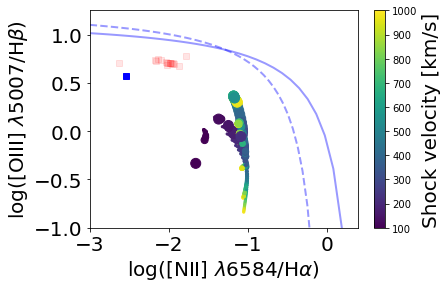

In [6]:
fig, ax = plt.subplots(facecolor='white')
size = 10*resultA.mag_fld
color = resultA.shck_vel
sc = ax.scatter(np.log10(resultA.NII),np.log10(resultA.OIII), c=color, s=size)
Nsize = 20
ax.set_xlabel(r'log([NII] $\lambda$6584/H$\alpha$)',fontsize=Nsize)
#ax.set_xlabel(r'log([SII] $\lambda \lambda$6716,6731/H$\alpha$)',fontsize=Nsize) 
ax.set_ylabel(r'log([OIII] $\lambda$5007/H$\beta$)',fontsize=Nsize)
cb = fig.colorbar(sc, ax=ax)
cb.set_label('Shock velocity [km/s]', fontsize=Nsize)

sii_int = 0
oiii_int = 0
nii_int = 0
ha_int = 0
hb_int = 0
for keys in data.keys():
       sii_int = sii_int + (data[keys][1][4] + data[keys][1][5])
       oiii_int = oiii_int + data[keys][1][1]
       nii_int = nii_int + data[keys][1][3]
       hb_int = ha_int + data[keys][1][0]
       ha_int = hb_int + data[keys][1][2]
       cociente1 = data[keys][1][1]/data[keys][1][0] #cociente1 = 2/1
       #cociente2 = (data[keys][1][4] + data[keys][1][5])/data[keys][1][2] #cociente2 = 4/3
       cociente2 = data[keys][1][3]/data[keys][1][2]
       plt.plot(np.log10(cociente2), np.log10(cociente1), 's', color='r', alpha = 0.1) #aquí cociente1 = x, cociente2 = y
#cociente2 = sii_int/ha_int
cociente2 = nii_int/ha_int
cociente1 = oiii_int/hb_int
ax.plot(np.log10(cociente2), np.log10(cociente1), 's', color='b', alpha = 1) #aquí cociente1 = x, cociente2 = y
	#plt.annotate(str(keys), xy = (np.log10(cociente2), np.log10(cociente1)), xytext = (np.log10(cociente2), np.log10(cociente1)), fontsize=6)


## Kewley+06 ------------------------------------------
X = np.linspace(-5,0.3)
Y = (0.61/(X - 0.47  )) + 1.19
#Y = (0.72/(X - 0.32)) + 1.30
## Kauffmann+03 ---------------------------------------
Xk = np.linspace(-3,0.)
Yk = 0.61/(Xk -0.05) + 1.3
ax.plot(X,   Y, '-' , color='blue', lw=2, label='Kewley+01', alpha = 0.4) # Kewley+06
ax.plot(Xk, Yk, '--', color='blue', lw=2, label='Kauffmann+03', alpha = 0.4) # Kauffmann+03
plt.tick_params(labelsize = Nsize)
#plt.savefig('BPT_SII_shockModels.png', dpi=100)
plt.ylim(-1, 1.25)
plt.xlim(-3, 0.39)